In [1]:
import networkx as nx
import matplotlib
import seaborn as sns
import numpy as np
%matplotlib inline

## Enlaces

In [2]:
# Se obtienen los enlaces (edges) desde el archivo
edges =[]
for line in open('users_network.txt'):
    if line[0] != '#':
        d = line.replace('\n','').split(';')
        edges.append((d[0],d[1]))
#print(edges)

## Nodos

In [3]:
# Se obtiene la lista de nodos
nodos = set()
for f,t in edges:
    nodos.add(f)
    nodos.add(t)
print(nodos)

{'Ye M.', 'Barka H.', 'Liu Y.-P.', 'Duan Y.', 'Liu K.J.R.', 'Ouyang R.', 'Boussaid O.', 'Guan B.', 'Toyoshima Y.', 'Jaison P.J.', 'Zuo D.', 'Weng X.', 'Qu F.', 'Grijalva S.', 'Galar D.', 'Hou J.', 'Jarrah M.', 'Contib D.', 'Gutierrez G.', 'Wu C.-H.', 'Apon A.W.', 'Williams R.', 'Zhang H.T.', 'Latinović T.S.', 'Flouris I.', 'Sato M.', 'Ali O.', 'Yang S.M.', 'Gollisch T.', 'Sieck J.', 'Yoon S.W.', 'Selvakumar R.', 'Acosta-Quiñonez R.I.', 'Sadeghi A.-R.', 'Espinoza D.L.', 'Zhang Z.-L.', 'He M.M.', 'Bekas C.', 'Zeng X.-Y.', 'Amberg M.', 'Nie M.', 'Haron A.', 'Mohanty S.', 'Noor M.', 'Polok L.', 'Huang J.-C.', 'Patel B.', 'Cemgil A.T.', 'Race N.', 'Blair J.', 'Abdo A.', 'Juan Y.-C.', 'Jafarian A.', 'Howe M.', 'Kasprzak A.', 'Alamri A.', 'McKee S.A.', 'Vimmadisetti D.', 'Serafimovich P.G.', 'Myalapalli V.K.', 'Hoang K.', 'Bruckman L.S.', 'Zoltowski C.B.', 'Passiante G.', 'Riasetiawan M.', 'Yakovlev A.', 'Baranowski J.', 'Gani A.', 'Feng W.L.', 'López E.', 'Pei Y.-X.', 'Ceci M.', 'Maidl U.', 

In [4]:
# Se obtiene el numero de hyperlinks (nodos) de la red
print("Numero de nodos: "+str(len(nodos)))

Numero de nodos: 13698


## Crear red

In [5]:
# Se crea la red G
G = nx.Graph()
# Se asigna a la red G los nodos de la lista nodos
G.add_nodes_from(nodos)

In [6]:
# Se valida la cantidad de nodos en el grafo
print("El numero total de nodos en la red G es: "+str(len(G.nodes())))

El numero total de nodos en la red G es: 13698


In [7]:
# Se asignan los egdes a la red G, tomados dese la lista edges
G.add_edges_from(edges)

In [8]:
# Se validan la cantidad total de edges en la red G
print("El numero total de edges en la red G es: "+str(len(G.edges())))

El numero total de edges en la red G es: 43459


## Matriz de adyasencia

In [20]:
# Matrix de adyasencia para red completa
A = nx.adjacency_matrix(G)
print(A)
# mostrar imagen de la red (poco visible)
#nx.draw_networkx(G)

## GRADO Y DISTRIBUCIONES DE GRADOS

In [9]:
# GRADO Y DISTRIBUCIONES DE GRADOS
# Grado para cada nodo
nodeDegrees = [degree for _, degree in G.degree().items()]
#print(str(nodeDegrees))

In [10]:
# Promedio de grado para la red G
print("Promedio de grado para la red es: "+str(np.mean(nodeDegrees)))

Promedio de grado para la red es: 6.34530588407


In [11]:
G_rand = nx.DiGraph()
N = len(G.nodes())
p = 2*len(edges)/(N*(N-1))
G_rand = nx.gnp_random_graph(N,p)

/Users/didergonzalezarroyave/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


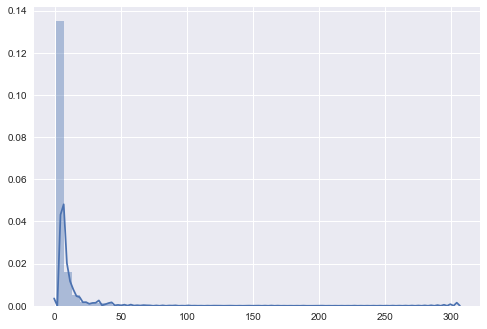

In [19]:
# Distribucion de grado para la red
sns.set()
distUsers = sns.distplot(list(G.degree().values()))
#sns.distplot(list(G_rand.degree().values()))

/Users/didergonzalezarroyave/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


[None, None]

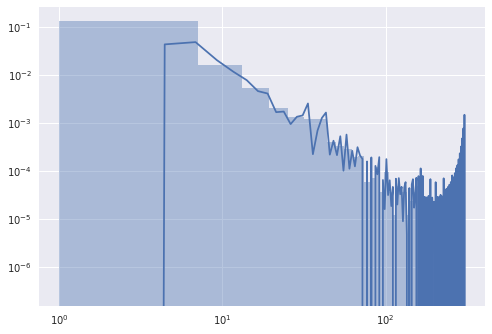

In [55]:


# Distribucion de grado para la red (log - log)
sns.set()
distUsers = sns.distplot(list(G.degree().values()))
#sns.distplot(list(G_rand.degree().values()))
distUsers.set(xscale="log", yscale="log")
# Se puede ver que la red G no sigue un modelo aleatorio

## Shortest path - Diametro de la red

In [37]:
# Average Shortest path para
#print(nx.shortest_path(G,'U223','U83'))
print("Average shortest path para red : "+ str(nx.average_shortest_path_length(G)))

In [57]:
# Diametro para red G
print("El diametro de la red no dirigida para G seria: "+ str(nx.diameter(G)))
print("El diametro de la red dirigida G seria infinito porque existen nodos que no tienen un camino a otros nodos")
# Es infinito porque existen nodos que no tienen un camino a otros nodos en la red dirigida

NetworkXError: Graph not connected: infinite path length

In [36]:
# Camino Euleriano para red G
print("Camino Euleriano de la red de peliculas: "+ str(sorted(nx.eulerian_circuit(G))))

NetworkXError: G is not Eulerian.

## Conectividad

In [36]:
# Se valida la conectividad de la red G
print("¿Es la red G conectada? "+str(nx.is_connected(G)))

¿Es la red G conectada? False


In [37]:
# Numero de componentes conectados en la red G
print("Numero de componentes conectados en la red G "+str(nx.number_connected_components(G)))

Numero de componentes conectados en la red G 2124


In [ ]:
# componentes conectados en la red G
print(list(nx.connected_components(G)))

In [14]:
# Se obtienen los componentes conectados como subgrafos
connectedComponents = nx.connected_component_subgraphs(G)
# Se obtiene el shortest path de cada componente
subComponents = []
for scomponent in connectedComponents:
    subComponents.append(nx.average_shortest_path_length(scomponent))
print(subComponents)


[4.308732448605154, 1.0, 1.3333333333333333, 1.4285714285714286, 1.0, 1.4, 1.5277777777777777, 1.0, 1.4444444444444444, 1.0, 1.0, 1.0, 1.6, 1.0, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 1.2666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.6222222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.7142857142857142, 1.0, 1.0, 1.0, 1.2857142857142858, 1.0, 1.605263157894737, 1.0, 1.0, 1.4285714285714286, 1.3333333333333333, 1.0, 1.8095238095238095, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3272727272727274, 1.2857142857142858, 1.0, 1.0, 1.0, 1.0, 1.4, 1.509090909090909, 1.0, 1.0, 1.8571428571428572, 1.0, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.9333333333333333, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 2.3181818181818183, 1.0, 1.0, 1.4545454545454546, 1.0, 1.2857142857142858, 1.3, 1.0, 2.1323529411764706, 1.0, 1.0, 3.24777183600713, 1.0, 1.0, 1.1333333333333333, 1.0, 1.0, 1.0, 1.4, 1.0, 1.0, 1.0, 1.0, 1.0, 3.1095238095238096, 1.0,

In [40]:
# Se ordenan los shortest path para encontrar los que tienen mas distancia
print(sorted(subComponents))

0


In [33]:
# Se obtienen los 3 componentes mas grandes de la red
connectedComponents = nx.connected_component_subgraphs(G)
sortedComponents = sorted(connectedComponents, key = len, reverse=True)
firstComponent = sortedComponents[0].edges()
secondComponent = sortedComponents[1].edges()
thirdComponent = sortedComponents[2].edges()

# Se exporta a un archivo txt el segundo componente mas grande
edges_firstComponent = open('gfirstComponent.txt', 'w')

print('Source;Target;Type', file=edges_firstComponent)
for kf, vf in sorted(firstComponent):
    print(kf+';'+vf+';'+'undirected', file=edges_firstComponent)

# Se exporta a un archivo txt el segundo componente mas grande
edges_secondComponent = open('gsecondComponent.txt', 'w')

print('Source;Target;Type', file=edges_secondComponent)
for ks, vs in sorted(secondComponent):
    print(ks+';'+vs+';'+'undirected', file=edges_secondComponent)

# Se exporta a un archivo txt el tercer componente mas grande
edges_thirdComponent = open('gthirdComponent.txt', 'w')

print('Source;Target;Type', file=edges_thirdComponent)
for kt, vt in sorted(thirdComponent):
    print(kt+';'+vt+';'+'undirected', file=edges_thirdComponent)

In [ ]:
# Se valida la conectividad fuerte de la red G
print("¿Es la red G fuertemente conectada? "+str(nx.is_strongly_connected(G)))

In [ ]:
# Numero de componentes que estan fuertemente conectados en la red G
print("En la red G hay "+str(nx.number_strongly_connected_components(G))+" componentes fuertemente conectados")

In [ ]:
# Se obtienen los nodos de la red G que estan fuertemente conectados
strongSubGraph = nx.strongly_connected_components_recursive(G)
for component in strongSubGraph:
    print(component)

In [ ]:
# Se valida la conectividad debil de la red G
print("¿Es la red G conectada de forma debil? "+str(nx.is_weakly_connected(G)))

In [ ]:
# Numero de componentes que estan conectados de forma debil en la red G
print("En la red G hay "+str(nx.number_weakly_connected_components(G))+" componentes conectados de forma debil")

In [ ]:
# Se obtienen los nodos de la red G que estan conectados de forma debil
weakSubGraph = nx.weakly_connected_components(G)
#print(weakSubGraph)
for component in weakSubGraph:
    print(component)

## Coeficiente de clustering

In [13]:
# Se halla el coeficiente de clustering de la red G, este solo aplica para redes no dirigidas
print("El coeficiente de clustering para la red G es: "+str(nx.average_clustering(G)))

El coeficiente de clustering para la red G es: 0.7827006465885163


In [12]:
# Se halla el coeficiente de clustering de la red aleatoria, este solo aplica para redes no dirigidas
print("El coeficiente de clustering para la red G es: "+str(nx.average_clustering(G_rand)))

El coeficiente de clustering para la red G es: 0.0005017949717905909


## BFS

In [61]:
# Se utiliza el algoritmo BFS para el nodo "1" en la red G
print(nx.bfs_predecessors(G,"Hill B."))

{'Proulx J.': 'Hill B.', 'Zeng-Treitler Q.': 'Hill B.'}


## Numero de triangulos

In [86]:
# Se halla el numero de triangulos de la red G, este solo aplica para redes no dirigidas
print("El numero de triangulos para la red G es:"+str(len(nx.triangles(G))))

El numero de triangulos para la red G es:13698


## Betweenness centrality

In [ ]:
# Se halla la centralidad intermedia para cada nodo de la red
# Toma bastante tiempo en computar
bw_centrality = nx.betweenness_centrality(G, normalized=False)

In [ ]:
# Se exporta el resultado de la centralidad intermedia a un archivo externo para analisis posterior
text_file = open("centralidad_intermedia.txt", "w")
text_file.write(str(bw_centrality))
text_file.close()
#print(bw_centrality)